In [2]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [2]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


,At1,At2,At3,At4,At5,At6,At7
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.398491,0.682104,0.415151,0.208745,0.169151,0.676349,0.375396
std,0.191452,0.207134,0.205799,0.199650,0.177329,0.218909,0.198132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244750,0.589000,0.277000,0.056000,0.049250,0.576000,0.238000
50%,0.413000,0.750000,0.442500,0.146000,0.113000,0.744000,0.397500
75%,0.505750,0.821000,0.545500,0.302500,0.226750,0.831250,0.486750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [3]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

Categorical columns:  []



discretization thresholds
num of features:  7
categorical features:  []
index_categorical:  []
Feature non categorical  0
# 0  GLOBAL CAIM  30.528645833333332
Feature non categorical  1
# 1  GLOBAL CAIM  31.055072463768116
Feature non categorical  2
# 2  GLOBAL CAIM  31.143656716417908
Feature non categorical  3
# 3  GLOBAL CAIM  26.656698564593302
Feature non categorical  4
# 4  GLOBAL CAIM  28.316964285714285
Feature non categorical  5
# 5  GLOBAL CAIM  30.528645833333332
Feature non categorical  6
# 6  GLOBAL CAIM  32.035547785547784

thresholds  {'At1': [0.0, 0.204, 1.884], 'At2': [0.0, 0.411, 1.964], 'At3': [0.0, 0.153, 1.927], 'At4': [0.0, 0.056, 2.0], 'At5': [0.0, 0.033, 1.784], 'At6': [0.0, 0.506, 1.956], 'At7': [0.0, 0.145, 1.837]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (79, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-b

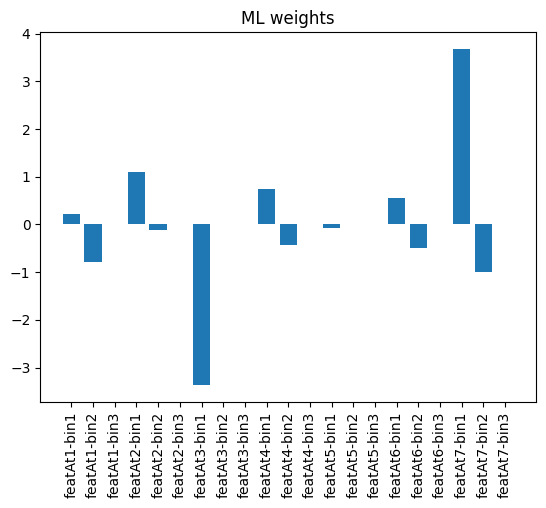

num of zero weights:  7
num of non-zero weights:  14
         Feature    Weight
0   featAt1-bin1  0.226767
1   featAt1-bin2 -0.788080
3   featAt2-bin1  1.098719
4   featAt2-bin2 -0.122541
6   featAt3-bin1 -3.366537
7   featAt3-bin2  0.000489
9   featAt4-bin1  0.749373
10  featAt4-bin2 -0.423908
12  featAt5-bin1 -0.082995
13  featAt5-bin2  0.000065
15  featAt6-bin1  0.559278
16  featAt6-bin2 -0.497075
18  featAt7-bin1  3.679957
19  featAt7-bin2 -0.993167


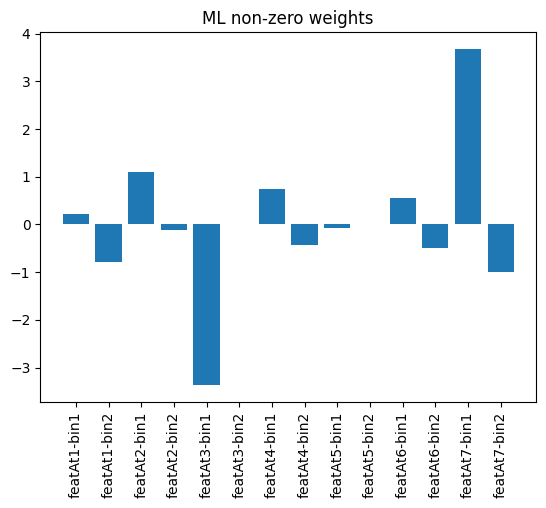


evaluate
encoding test set
X_disc shape:  (27, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],
      dtype='object')
X_disc head:     featAt1-bin1  featAt1-bin2  featAt1-bin3  featAt2-bin1  featAt2-bin2  \
0             0             1             0             0             1   
1             1             0             0             0             1   
2             0             1             0             0             1   
3             0             1             0             0             1   
4             0             1             0             0             1   

   featAt2-bin3  featAt3-bin1  featAt3-bin2  featAt3-bin3  featAt

In [5]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=13)
_, infbins_accuracy, _ = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammographic masses
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

In [ ]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

In [ ]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

In [ ]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

In [ ]:
aesthetic_evaluation_y.value_counts()

In [ ]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
aesthetic_evaluation_binary_y.value_counts()

In [ ]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")


In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## adult
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


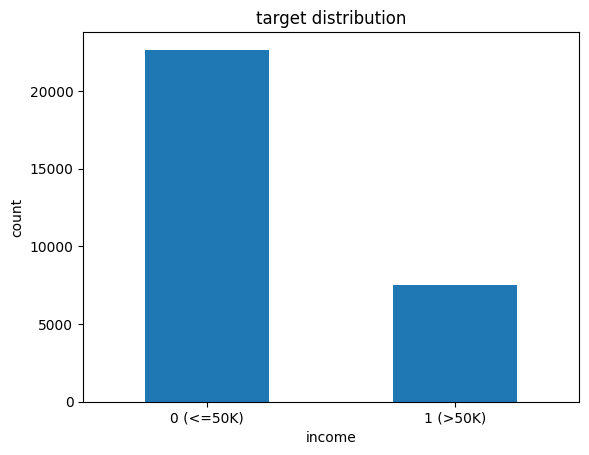

In [3]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()


In [4]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [5]:
# show occupation column
print("\noccupation column: ", adult_X['occupation'].unique())


occupation column:  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [6]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]


In [7]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_ml_model, adult_infbins_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
adult_caim_diff_ml_model, adult_caim_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
adult_infbins_diff_ml_model, adult_infbins_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=77)
scorecard.evaluate()
end_time = time.time() 
print(f"Execution time: {end_time - start_time} seconds")

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

In [ ]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

In [ ]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

In [ ]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

In [ ]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## telemarketing
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [ ]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()


In [ ]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()


In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X.loc[:, col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])